<a href="https://colab.research.google.com/github/Nadia01cg-bit/Data-Analytics/blob/main/Spot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About dataset

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.



In [ ]:
# track_name: Name of the song
# artist(s)_name: Name of the artist(s) of the song
# artist_count: Number of artists contributing to the song
# released_year: Year when the song was released
# released_month: Month when the song was released
# released_day: Day of the month when the song was released
# in_spotify_playlists: Number of Spotify playlists the song is included in
# in_spotify_charts: Presence and rank of the song on Spotify charts
# streams: Total number of streams on Spotify
# in_apple_playlists: Number of Apple Music playlists the song is included in
# in_apple_charts: Presence and rank of the song on Apple Music charts
# in_deezer_playlists: Number of Deezer playlists the song is included in
# in_deezer_charts: Presence and rank of the song on Deezer charts
# in_shazam_charts: Presence and rank of the song on Shazam charts
# bpm: Beats per minute, a measure of song tempo
# key: Key of the song
# mode: Mode of the song (major or minor)
# danceability_%: Percentage indicating how suitable the song is for dancing
# valence_%: Positivity of the song's musical content
# energy_%: Perceived energy level of the song
# acousticness_%: Amount of acoustic sound in the song
# instrumentalness_%: Amount of instrumental content in the song
# liveness_%: Presence of live performance elements
# speechiness_%: Amount of spoken words in the song

In [ ]:
# Music analysis: Explore patterns in audio features to understand trends and preferences in popular songs.
# Platform comparison: Compare the song's popularity across different music platforms.
# Artist impact: Analyze how artist involvement and attributes relate to a song's success.
# Temporal trends: Identify any shifts in music attributes and preferences over time.
# Cross-platform presence: Investigate how songs perform across different streaming services.

In [ ]:
import pandas as pd
import numpy as np


import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')
import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']
# this eliminates the requirement to use plt.show() after every plot
%matplotlib inline

# changing the default figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/spotify-2023.csv", encoding='latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


## Data cleaning and preprocessing

In [ ]:
df = df.rename (columns =str.lower)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df = df.drop_duplicates()

In [ ]:
len(df)
#no duplicate

953

In [ ]:
df.nunique()
#there are multiple track name in the chart

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [ ]:
#checking same track
duplicate_rows = df.duplicated('track_name', keep = False)
duplicate_rows_df = df[duplicate_rows]
duplicate_rows_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,134,C#,Minor,59,51,52,9,0,15,7
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
331,Numb,Linkin Park,1,2003,3,24,20111,5,1361425037,39,...,110,A,Major,50,24,86,0,0,64,4
335,Miss You,"Robin Schulz, Oliver Tree",2,2022,8,5,5730,10,497225336,108,...,145,F#,Minor,59,20,74,1,0,15,5
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,...,148,G#,Major,47,15,52,38,13,29,5
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,...,134,C#,Major,45,72,24,91,0,18,4


In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [ ]:
# Create a copy for human-readable data
df['shazam_charts_check'] = df['in_shazam_charts']

df['in_shazam_charts'] = df['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)

# Create another copy for ML processing
df['in_shazam_charts_forML'] = df['in_shazam_charts'].copy()

# Find the max rank
max_rank = df['in_shazam_charts_forML'].max()

# In the 'readable' version, replace NaN with "Not Ranked"
df['shazam_charts_check'].fillna("Not Ranked", inplace=True)

# In the 'forML' version, replace NaN with max_rank + 1
df['in_shazam_charts_forML'].fillna(max_rank + 1, inplace=True)

# Drop the original 'in_shazam_charts' column
df.drop('in_shazam_charts', axis=1, inplace=True)


df['in_shazam_charts_forML'] = df['in_shazam_charts_forML'].astype(int)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   track_name              953 non-null    object
 1   artist(s)_name          953 non-null    object
 2   artist_count            953 non-null    int64 
 3   released_year           953 non-null    int64 
 4   released_month          953 non-null    int64 
 5   released_day            953 non-null    int64 
 6   in_spotify_playlists    953 non-null    int64 
 7   in_spotify_charts       953 non-null    int64 
 8   streams                 953 non-null    object
 9   in_apple_playlists      953 non-null    int64 
 10  in_apple_charts         953 non-null    int64 
 11  in_deezer_playlists     953 non-null    object
 12  in_deezer_charts        953 non-null    int64 
 13  bpm                     953 non-null    int64 
 14  key                     858 non-null    object
 15  mode  

In [ ]:
# remove the key
df = df.dropna(subset = ["key"])

print (" missing value after removal :", df['key'].isnull().sum())

 missing value after removal : 0


In [ ]:
df.dtypes

track_name                object
artist(s)_name            object
artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlists       int64
in_spotify_charts          int64
streams                   object
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists       object
in_deezer_charts           int64
bpm                        int64
key                       object
mode                      object
danceability_%             int64
valence_%                  int64
energy_%                   int64
acousticness_%             int64
instrumentalness_%         int64
liveness_%                 int64
speechiness_%              int64
shazam_charts_check       object
in_shazam_charts_forML     int64
dtype: object

In [ ]:
# Convert 'streams', 'in_deezer_playlists' to appropriate numerical or categorical data types
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [ ]:
df.dtypes

track_name                 object
artist(s)_name             object
artist_count                int64
released_year               int64
released_month              int64
released_day                int64
in_spotify_playlists        int64
in_spotify_charts           int64
streams                   float64
in_apple_playlists          int64
in_apple_charts             int64
in_deezer_playlists       float64
in_deezer_charts            int64
bpm                         int64
key                        object
mode                       object
danceability_%              int64
valence_%                   int64
energy_%                    int64
acousticness_%              int64
instrumentalness_%          int64
liveness_%                  int64
speechiness_%               int64
shazam_charts_check        object
in_shazam_charts_forML      int64
dtype: object

In [ ]:
df.isnull().sum()

track_name                 0
artist(s)_name             0
artist_count               0
released_year              0
released_month             0
released_day               0
in_spotify_playlists       0
in_spotify_charts          0
streams                    1
in_apple_playlists         0
in_apple_charts            0
in_deezer_playlists       75
in_deezer_charts           0
bpm                        0
key                        0
mode                       0
danceability_%             0
valence_%                  0
energy_%                   0
acousticness_%             0
instrumentalness_%         0
liveness_%                 0
speechiness_%              0
shazam_charts_check        0
in_shazam_charts_forML     0
dtype: int64

In [ ]:
#checking streams NA
print (df[df['streams'].isna()])
#COLUMN 574

                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  ...   mode  \
574                  0      NaN                  16  ...  Major   

     danceability_%  valence_%  energy_% acousticness_% instrumentalness_%  \
574              53         75        69              7                  0   

     liveness_%  speechiness_%  shazam_charts_check  in_shazam_charts_forML  
574          17              3                    0                       0  

[1 rows x 25 columns]


In [ ]:
# drop NA streams in row 574
df = df.dropna(subset=['streams'])

In [ ]:
print(df[df['in_deezer_playlists'].isna()])

              track_name         artist(s)_name  artist_count  released_year  \
48               Starboy  The Weeknd, Daft Punk             2           2016   
54          Another Love              Tom Odell             1           2012   
55       Blinding Lights             The Weeknd             1           2019   
65                Yellow          Chris Molitor             1           1999   
73       Sweater Weather      The Neighbourhood             1           2012   
..                   ...                    ...           ...            ...   
761           Photograph             Ed Sheeran             1           2014   
762        Love Yourself          Justin Bieber             1           2015   
871  Sweet Child O' Mine          Guns N' Roses             1           1987   
893            Heartless             Kanye West             1           2008   
910        The Scientist               Coldplay             1           2002   

     released_month  released_day  in_s

In [ ]:
df = df.dropna(subset=['in_deezer_playlists'])

In [ ]:
for column_name in df.columns:
  column = df[column_name]
  # Get the count of Zeros in column
  count = (column == 0).sum()
  print('Count of zeros in column ', column_name, ' is : ', count)


Count of zeros in column  track_name  is :  0
Count of zeros in column  artist(s)_name  is :  0
Count of zeros in column  artist_count  is :  0
Count of zeros in column  released_year  is :  0
Count of zeros in column  released_month  is :  0
Count of zeros in column  released_day  is :  0
Count of zeros in column  in_spotify_playlists  is :  0
Count of zeros in column  in_spotify_charts  is :  347
Count of zeros in column  streams  is :  0
Count of zeros in column  in_apple_playlists  is :  20
Count of zeros in column  in_apple_charts  is :  86
Count of zeros in column  in_deezer_playlists  is :  21
Count of zeros in column  in_deezer_charts  is :  479
Count of zeros in column  bpm  is :  0
Count of zeros in column  key  is :  0
Count of zeros in column  mode  is :  0
Count of zeros in column  danceability_%  is :  0
Count of zeros in column  valence_%  is :  0
Count of zeros in column  energy_%  is :  0
Count of zeros in column  acousticness_%  is :  43
Count of zeros in column  inst

In [ ]:
df['in_deezer_playlists'].fillna(0, inplace=True)

In [ ]:
df['in_deezer_playlists'].isna().sum()

0

In [ ]:
df.dtypes

track_name                 object
artist(s)_name             object
artist_count                int64
released_year               int64
released_month              int64
released_day                int64
in_spotify_playlists        int64
in_spotify_charts           int64
streams                   float64
in_apple_playlists          int64
in_apple_charts             int64
in_deezer_playlists       float64
in_deezer_charts            int64
bpm                         int64
key                        object
mode                       object
danceability_%              int64
valence_%                   int64
energy_%                    int64
acousticness_%              int64
instrumentalness_%          int64
liveness_%                  int64
speechiness_%               int64
shazam_charts_check        object
in_shazam_charts_forML      int64
dtype: object

##Data preparation

one hot encoding

In [ ]:
# mode

mode_onehot = pd.get_dummies (df['mode'], prefix =  'mode')
print(mode_onehot)

     mode_Major  mode_Minor
0             1           0
1             1           0
2             1           0
3             1           0
4             0           1
..          ...         ...
948           1           0
949           1           0
950           1           0
951           1           0
952           0           1

[782 rows x 2 columns]


In [ ]:
df = pd.concat([df, mode_onehot], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 952
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_name              782 non-null    object 
 1   artist(s)_name          782 non-null    object 
 2   artist_count            782 non-null    int64  
 3   released_year           782 non-null    int64  
 4   released_month          782 non-null    int64  
 5   released_day            782 non-null    int64  
 6   in_spotify_playlists    782 non-null    int64  
 7   in_spotify_charts       782 non-null    int64  
 8   streams                 782 non-null    float64
 9   in_apple_playlists      782 non-null    int64  
 10  in_apple_charts         782 non-null    int64  
 11  in_deezer_playlists     782 non-null    float64
 12  in_deezer_charts        782 non-null    int64  
 13  bpm                     782 non-null    int64  
 14  key                     782 non-null    ob

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:

label_encoder = LabelEncoder()
df['key_encoded'] = label_encoder.fit_transform(df['key'].astype(str))


print("\nUpdated Data with Encoded Categorical Variables:")
print(df[['mode', *mode_onehot.columns, 'key', 'key_encoded']].head())


Updated Data with Encoded Categorical Variables:
    mode  mode_Major  mode_Minor key  key_encoded
0  Major           1           0   B            2
1  Major           1           0  C#            3
2  Major           1           0   F            7
3  Major           1           0   A            0
4  Minor           0           1   A            0


In [ ]:
percentage_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Print min and max values for each percentage column
for col in percentage_columns:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

danceability_%: Min = 23, Max = 96
valence_%: Min = 4, Max = 97
energy_%: Min = 14, Max = 97
acousticness_%: Min = 0, Max = 97
instrumentalness_%: Min = 0, Max = 91
liveness_%: Min = 3, Max = 97
speechiness_%: Min = 2, Max = 64


In [ ]:
for col in percentage_columns :
  df[col + 'forML'] = df[col]/100

In [ ]:
df.dtypes

track_name                  object
artist(s)_name              object
artist_count                 int64
released_year                int64
released_month               int64
released_day                 int64
in_spotify_playlists         int64
in_spotify_charts            int64
streams                    float64
in_apple_playlists           int64
in_apple_charts              int64
in_deezer_playlists        float64
in_deezer_charts             int64
bpm                          int64
key                         object
mode                        object
danceability_%               int64
valence_%                    int64
energy_%                     int64
acousticness_%               int64
instrumentalness_%           int64
liveness_%                   int64
speechiness_%                int64
shazam_charts_check         object
in_shazam_charts_forML       int64
mode_Major                   uint8
mode_Minor                   uint8
key_encoded                  int64
danceability_%forML 

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,mode_Major,mode_Minor,key_encoded,danceability_%forML,valence_%forML,energy_%forML,acousticness_%forML,instrumentalness_%forML,liveness_%forML,speechiness_%forML
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,7.820000e+02,782.000000,782.000000,782.000000,...,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.00000,782.000000
mean,1.571611,2019.289003,6.152174,13.971867,3302.015345,11.187980,3.993000e+08,53.656010,48.121483,106.126598,...,0.543478,0.456522,5.156010,0.675307,0.513210,0.640806,0.271074,0.016304,0.18335,0.106113
std,0.883401,10.549723,3.500300,9.094424,3973.777323,18.744026,4.071677e+08,64.385408,49.424155,174.485358,...,0.498425,0.498425,3.245595,0.145077,0.236404,0.158999,0.254634,0.086574,0.13749,0.102224
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.230000,0.040000,0.140000,0.000000,0.000000,0.03000,0.020000
25%,1.000000,2021.000000,3.000000,6.000000,804.750000,0.000000,1.295909e+08,11.000000,6.000000,12.000000,...,0.000000,0.000000,2.000000,0.580000,0.320000,0.530000,0.060000,0.000000,0.10000,0.040000
50%,1.000000,2022.000000,6.000000,13.000000,1930.000000,2.000000,2.477135e+08,29.000000,31.000000,34.000000,...,1.000000,0.000000,5.000000,0.700000,0.510000,0.650000,0.180000,0.000000,0.12000,0.060000
75%,2.000000,2022.000000,9.000000,22.000000,4195.500000,15.000000,5.281668e+08,71.000000,80.000000,109.750000,...,1.000000,1.000000,8.000000,0.790000,0.710000,0.760000,0.420000,0.000000,0.24000,0.120000
max,8.000000,2023.000000,12.000000,31.000000,29499.000000,147.000000,2.808097e+09,492.000000,275.000000,965.000000,...,1.000000,1.000000,10.000000,0.960000,0.970000,0.970000,0.970000,0.910000,0.97000,0.640000


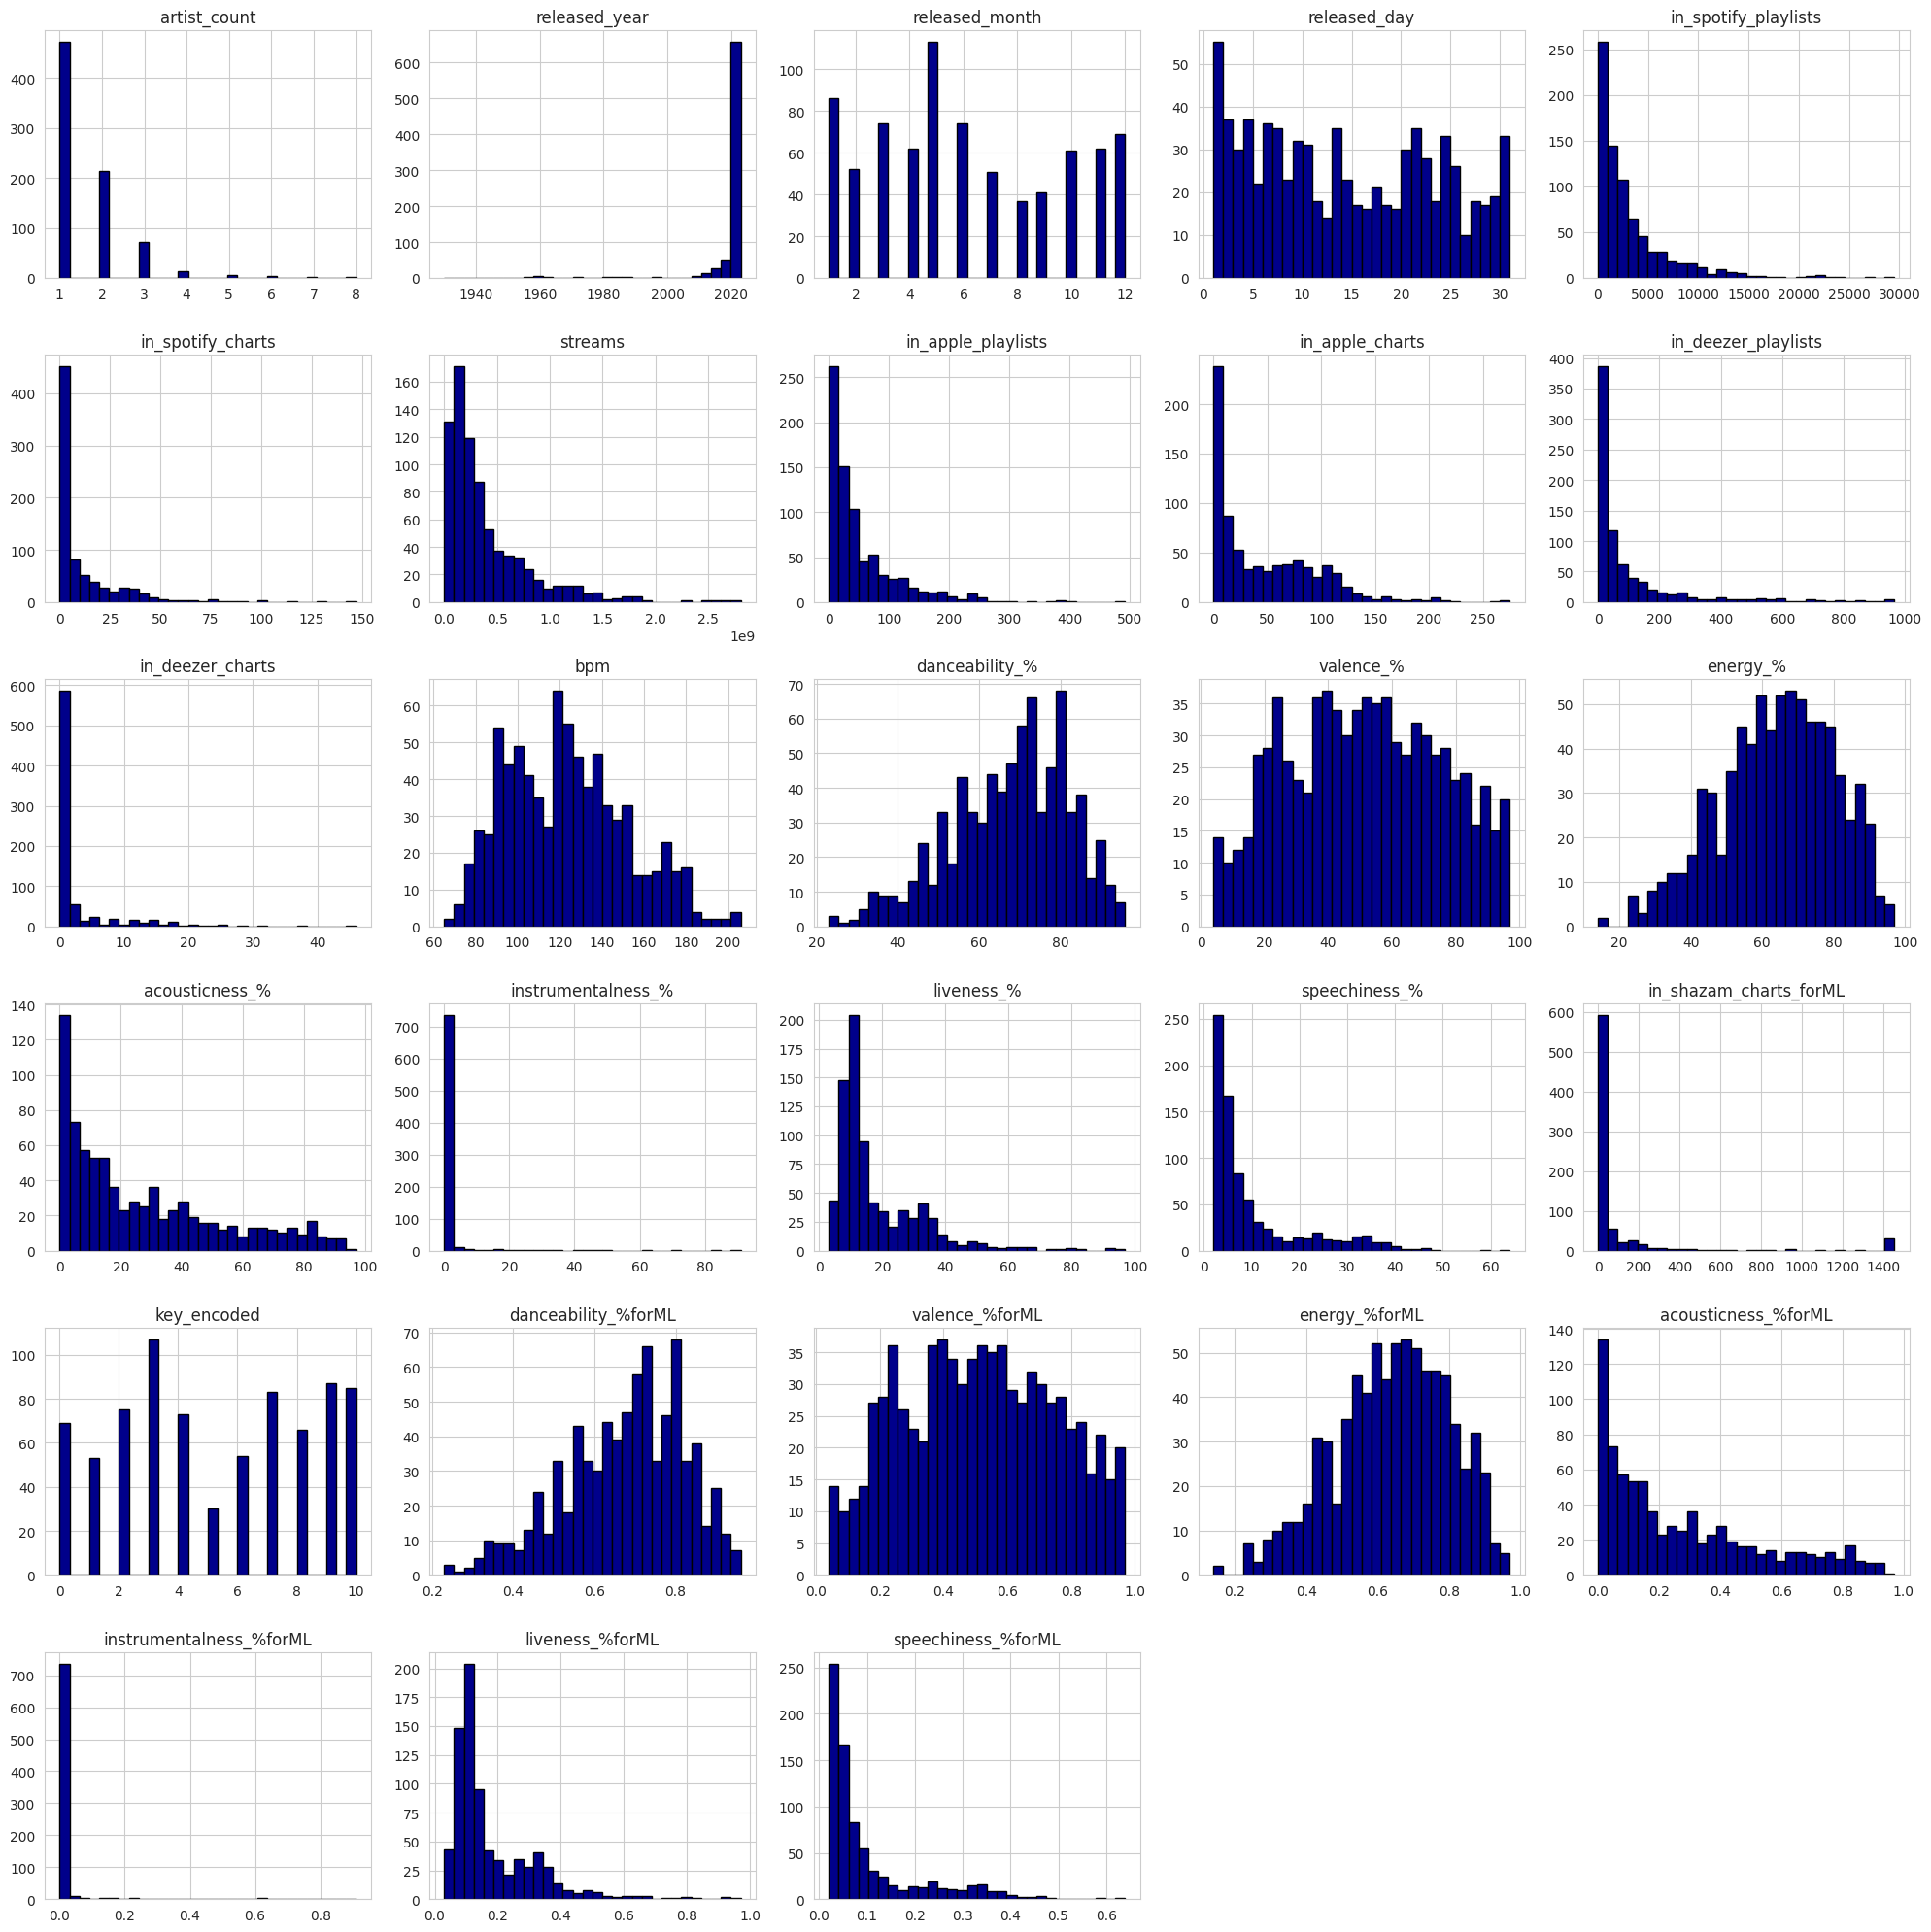

In [ ]:
sns.set_style("whitegrid")

# Plotting histograms for all numerical columns
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='darkblue', edgecolor='black')
plt.tight_layout()
plt.show()


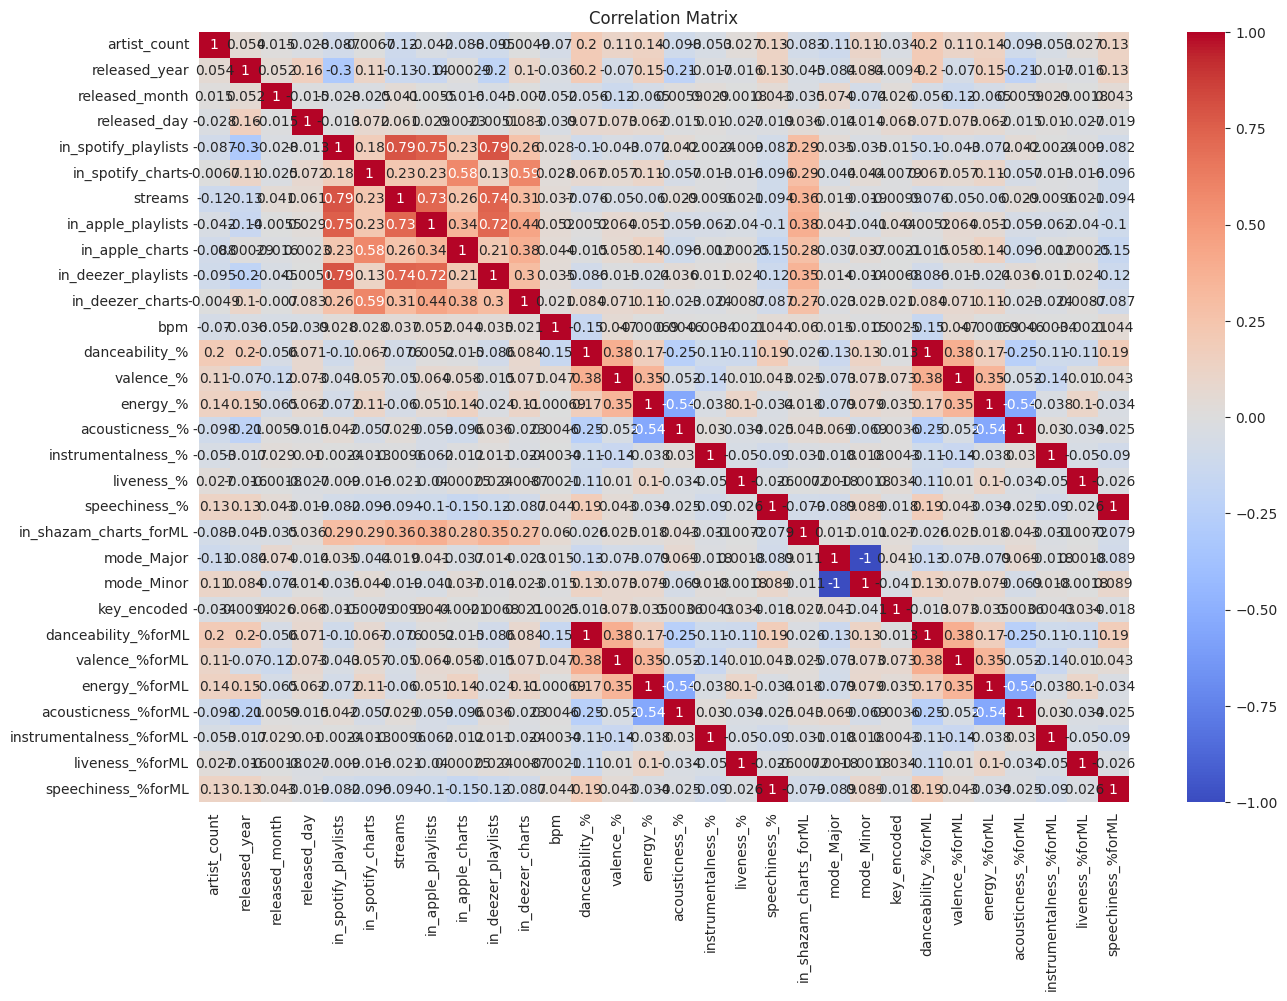

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# find the most streamed songs
most_streamed_songs = df[['artist(s)_name', 'track_name', 'streams']].nlargest(5,'streams')
most_streamed_songs

,artist(s)_name,track_name,streams
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2.665344e+09
71,Glass Animals,Heat Waves,2.557976e+09
14,Harry Styles,As It Was,2.513188e+09
621,Juice WRLD,Lucid Dreams,2.288695e+09


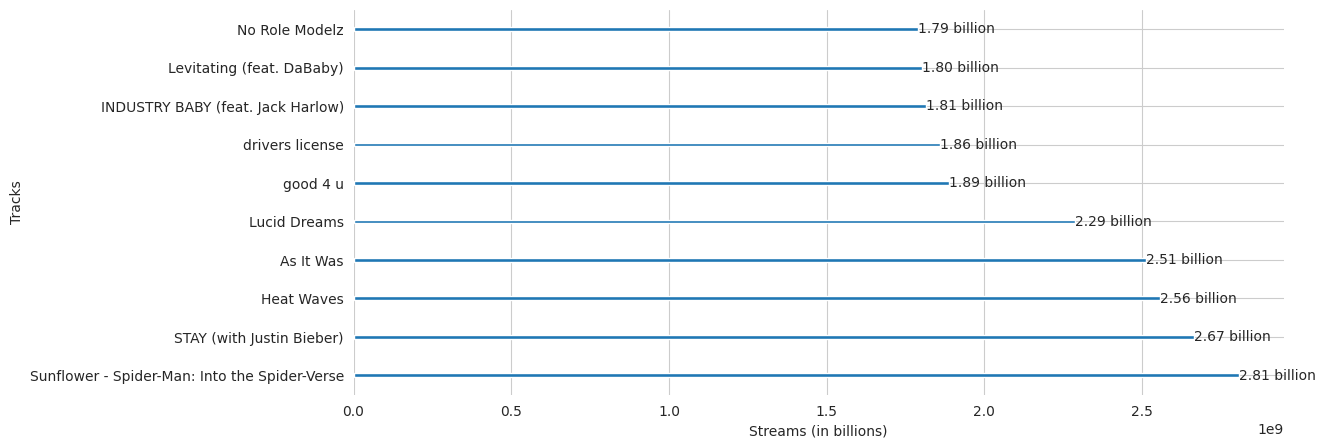

In [ ]:
top_10_streams = df.nlargest(10, 'streams')
fig, ax = plt.subplots(figsize=(12,5))
bar_container = ax.barh(top_10_streams['track_name'], top_10_streams['streams'], height = 0.1);

ax.set(xlabel='Streams (in billions)',ylabel= 'Tracks')
ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**9:.2f} billion')
#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)

<Axes: >

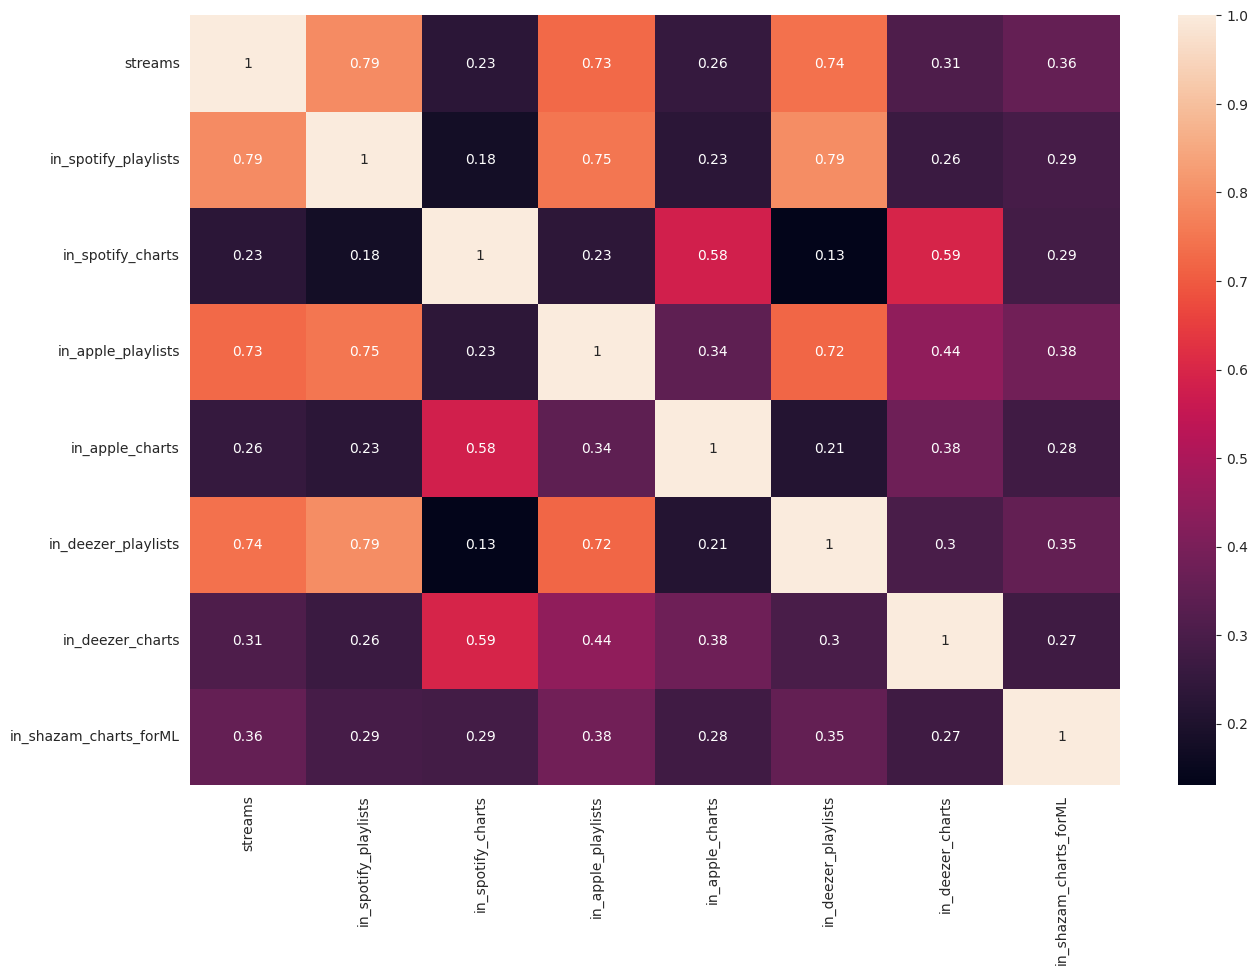

In [ ]:
cols = ['streams', 'in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts_forML']
sns.heatmap(df[cols].corr(),annot=True)

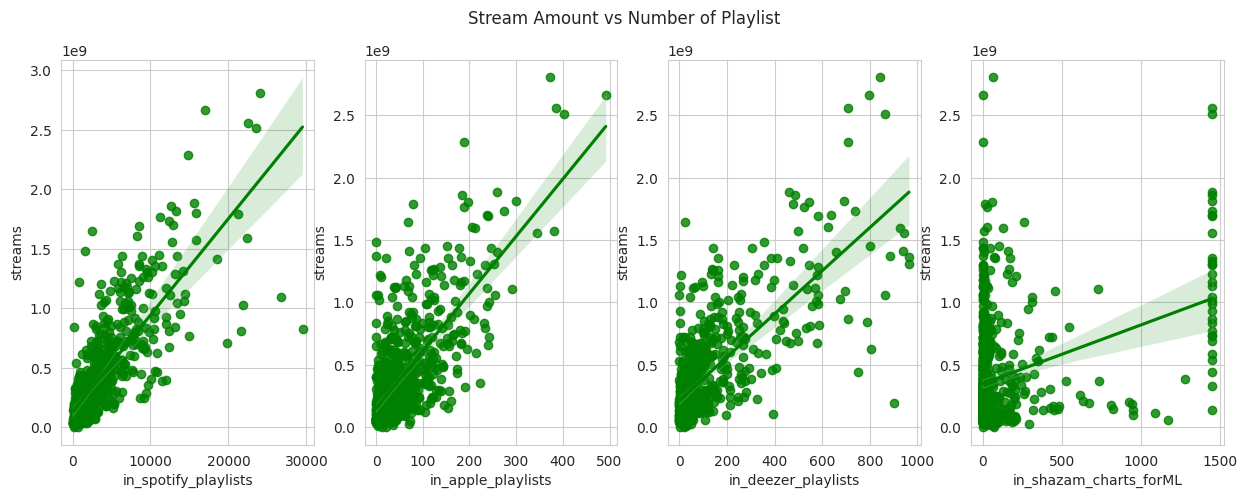

In [ ]:
cols = ['in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists','in_shazam_charts_forML']
fig, ax = plt.subplots(1,4,figsize=(15,5))
for count, col in enumerate(cols):
    sns.regplot(data=df,x=col, y='streams', ax=ax[count], color='green',ci=99)
plt.suptitle('Stream Amount vs Number of Playlist')
plt.show()

In [ ]:
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
audio_features_by_year = df.groupby('released_year')[audio_features].mean().reset_index()
audio_features_by_year

,released_year,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,1930,65.000000,49.000000,80.000000,22.000000,7.000000,5.000000
1,1942,23.000000,19.000000,25.000000,91.000000,40.000000,3.000000
2,1946,36.000000,22.000000,15.000000,84.000000,11.000000,4.000000
3,1950,60.000000,86.000000,32.000000,88.000000,34.000000,6.000000
4,1957,62.500000,86.000000,35.500000,78.500000,8.000000,4.000000
5,1958,70.666667,83.666667,48.000000,75.666667,22.333333,6.000000
6,1959,57.000000,84.000000,30.000000,86.000000,13.000000,4.000000
7,1963,37.000000,65.000000,71.000000,52.000000,17.333333,4.000000
8,1970,50.000000,96.000000,82.000000,47.000000,34.000000,4.000000
9,1971,33.000000,39.000000,61.000000,32.000000,77.000000,3.000000


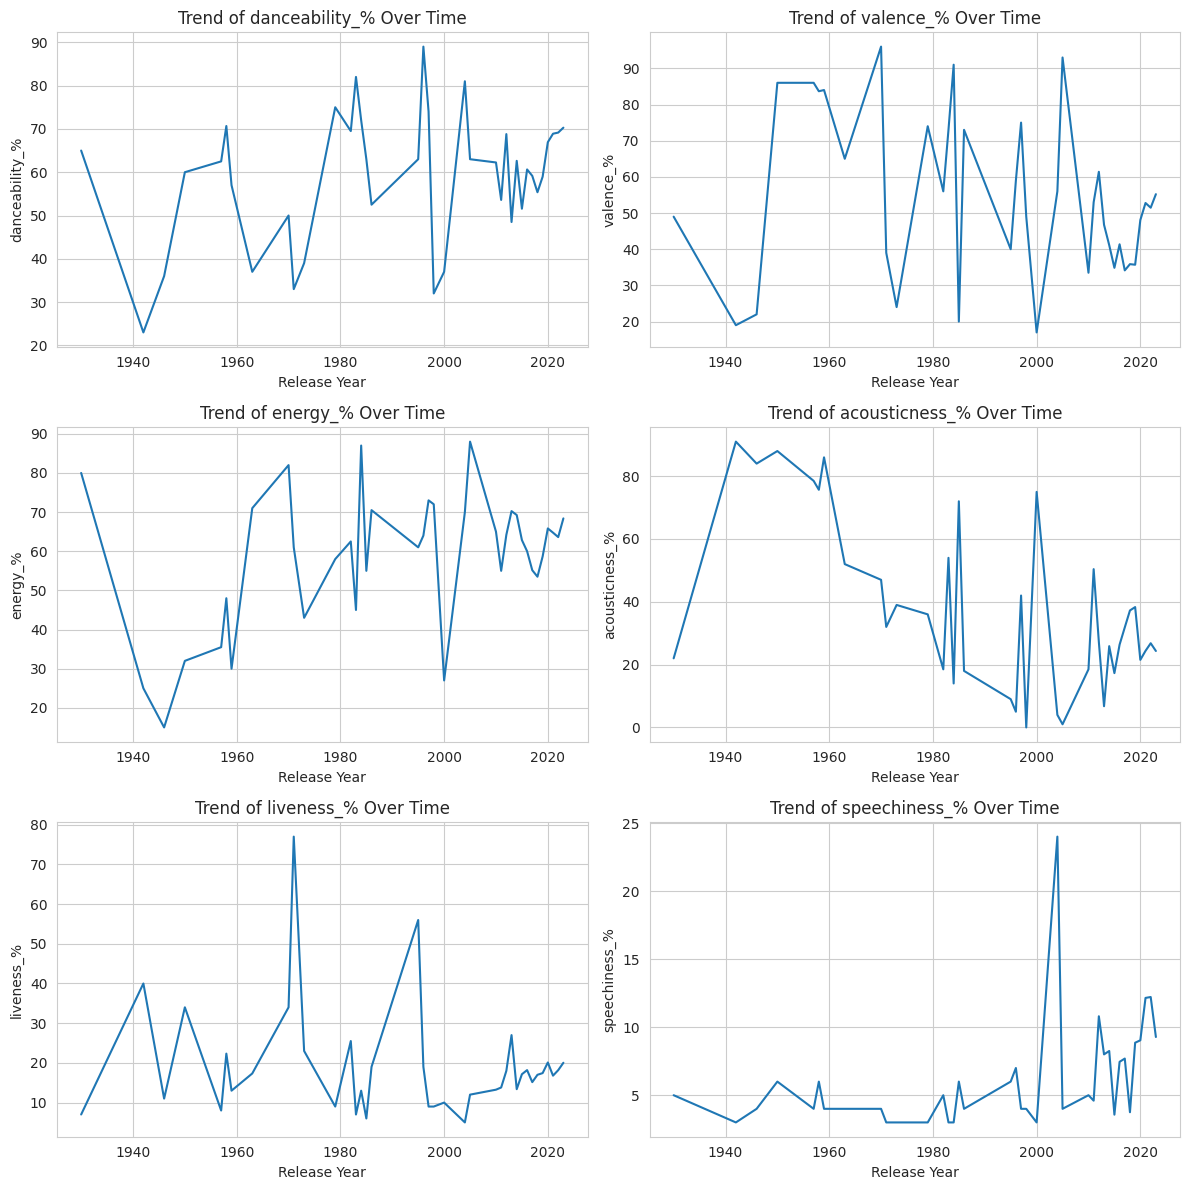

In [ ]:
plt.figure(figsize=(12, 12))

for i, feature in enumerate(audio_features, start=1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=audio_features_by_year, x='released_year', y=feature)
    plt.xlabel('Release Year')
    plt.ylabel(feature)
    plt.title(f'Trend of {feature} Over Time')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
target_month = 1  # January


In [ ]:
# Filter the data for songs released in January
songs_in_jan_spotify = df[(df['released_month'] == target_month) & (df['in_spotify_charts'] > 0)].nlargest(50, 'in_spotify_charts')
top_50_spotify_details = songs_in_jan_spotify[['track_name', 'artist(s)_name', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
print("Top 50 Songs on Spotify Chart in January:")
print(top_50_spotify_details)

Top 50 Songs on Spotify Chart in January:
                                            track_name  \
37                                         Blank Space   
132                                              Radio   
133              Shakira: Bzrp Music Sessions, Vol. 53   
38                                               Style   
110                                        Money Trees   
700                             Una Noche en Medellï¿½   
131                                                OMG   
160                                                PRC   
100                                              Lover   
356                                              WANDA   
149                             El Gordo Trae El Mando   
319                                  Murder In My Mind   
28                                          Last Night   
166            Every Breath You Take - Remastered 2003   
382                                          TRUSTFALL   
163                           

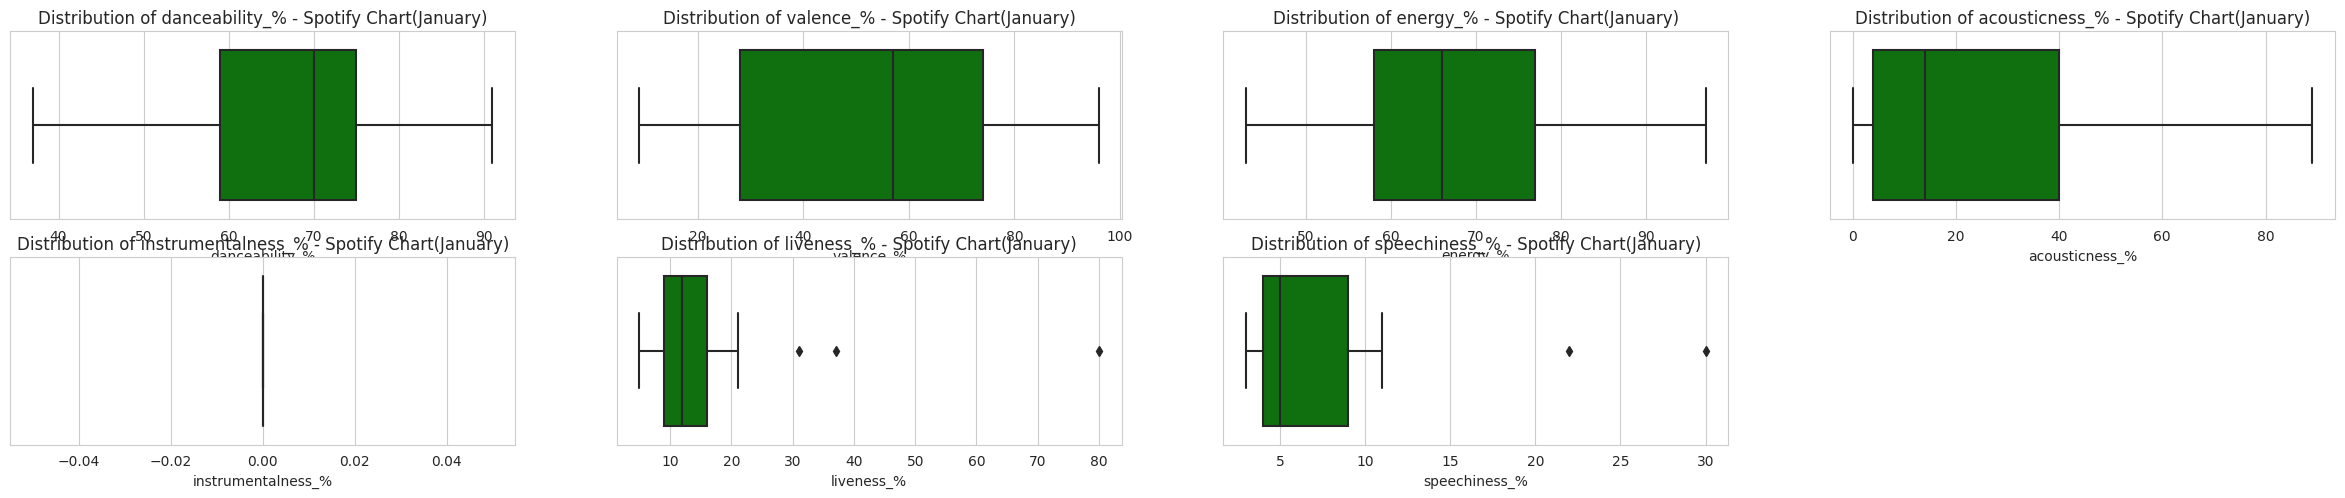

In [ ]:
# Features to visualize
features_to_visualize = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Create subplots for each feature
plt.figure(figsize=(30, 20))

# Spotify Chart
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(7, 4, i)
    sns.boxplot(x=top_50_spotify_details[feature],color='green')
    plt.title(f'Distribution of {feature} - Spotify Chart(January)')

In [ ]:
!pip install lazypredict


In [ ]:
from lazypredict.Supervised import LazyRegressor,LazyClassifier


In [ ]:
cols_for_BPM = ['artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts', 'key_encoded', 'danceability_%forML',
    'valence_%forML', 'energy_%forML', 'acousticness_%forML', 'instrumentalness_%forML',
    'liveness_%forML', 'speechiness_%forML', 'streams']
cols_for_STREAM = ['artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%forML',
    'valence_%forML', 'energy_%forML', 'acousticness_%forML', 'instrumentalness_%forML',
    'liveness_%forML', 'speechiness_%forML', 'key_encoded']

In [ ]:

x_STREAM = df[cols_for_STREAM]
y_STREAM = df['streams']
x_train,x_temp,y_train,y_temp = train_test_split(x_STREAM,y_STREAM,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)
# Use LazyRegressor to find the best regression model
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# cls = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_val, y_train, y_val)
# models, predictions = cls.fit(x_train, x_val, y_train, y_val)
# Print the list of models and their performance
print(models)

100%|██████████| 42/42 [00:05<00:00,  7.34it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 625, number of used features: 19
[LightGBM] [Info] Start training from score 404439937.321600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
predictions.head(5)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.72,0.79,160308218.89,0.40
LGBMRegressor,0.68,0.76,170800682.16,0.17
LarsCV,0.67,0.75,172842197.68,0.07
LassoLarsCV,0.67,0.75,172842197.68,0.07
LassoCV,0.67,0.75,172904095.91,0.15


In [ ]:
# smallest error
models.loc[models['RMSE'] == models['RMSE'].min()].index[0]

'ExtraTreesRegressor'

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

etr = ExtraTreesRegressor(n_estimators=1000,random_state=42).fit(x_train,y_train)

In [ ]:
y_pred = etr.predict(x_val)

mse = mean_squared_error(y_val,y_pred)
mae = mean_absolute_error(y_val,y_pred)
r2 = r2_score(y_val,y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(etr.get_params())

Mean Squared Error (MSE): 2.477968940678735e+16
Mean Absolute Error (MAE): 109569320.10328206
R^2 Score: 0.793582452262118
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
y_test_pred = etr.predict(x_test)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R^2 Score: {r2_test}")


Test Set Evaluation:
Mean Squared Error (MSE): 2.199107261492109e+16
Mean Absolute Error (MAE): 105143760.77235442
R^2 Score: 0.8249082096861837


In [ ]:
# Retrive feature importance from the random forest model(To see which ones are important)
feature_importances = etr.feature_importances_
features_df = pd.DataFrame({
    'Feature': cols_for_STREAM,
    'Importance': feature_importances
})

print("Feature Importances:")
print(features_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                    Feature  Importance
4      in_spotify_playlists        0.33
8       in_deezer_playlists        0.27
6        in_apple_playlists        0.13
1             released_year        0.05
5         in_spotify_charts        0.04
2            released_month        0.02
12           valence_%forML        0.02
3              released_day        0.02
14      acousticness_%forML        0.01
10                      bpm        0.01
17       speechiness_%forML        0.01
7           in_apple_charts        0.01
9          in_deezer_charts        0.01
13            energy_%forML        0.01
11      danceability_%forML        0.01
16          liveness_%forML        0.01
18              key_encoded        0.01
0              artist_count        0.01
15  instrumentalness_%forML        0.01


In [ ]:
#tuning hyperparameter
param_grid = {
    'n_estimators': [100, 200,500,1000],
    'max_features': ['sqrt','log2',1.0],
    'max_depth': [None, 10, 20, 30,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict using the best model
y_val_pred_grid = grid_search.best_estimator_.predict(x_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_val_pred_grid)
mae = mean_absolute_error(y_val, y_val_pred_grid)
r2 = r2_score(y_val, y_val_pred_grid)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error (MSE): 2.429972132210612e+16
Mean Absolute Error (MAE): 107320689.53297737
R^2 Score: 0.7975806393824623
